In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from transduction import FST, FSA, EPSILON, PrecoverDecomp, examples, Precover
from transduction.util import display_table

The following FST is not a function.

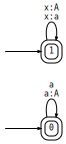

In [17]:
fst = FST()
fst.add_start(0)
fst.add_arc(0, 'a', 'A', 0)
fst.add_arc(0, 'a', 'a', 0)
fst.add_stop(0)

fst.add_start(1)
fst.add_arc(1, 'x', 'A', 1)
fst.add_arc(1, 'x', 'a', 1)
fst.add_stop(1)
fst

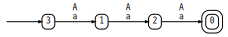

In [18]:
fst('aaa', None).min()

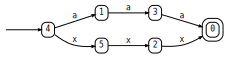

In [21]:
fst(None, 'aaa').min()

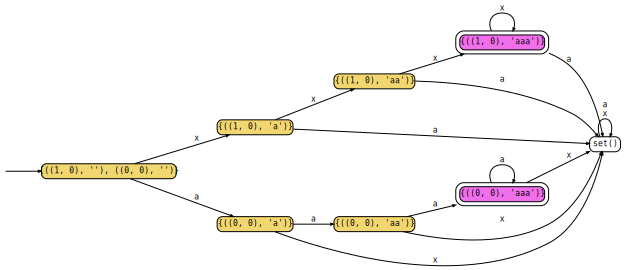

In [19]:
Precover(fst, 'aaa')

Stochastic map

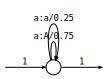

In [55]:
import genparse
import genparse.fst
fst = genparse.fst.FST(genparse.Float)
fst.add_I(0, 1)
fst.add_arc(0, ('a', 'A'), 0, 0.75)
fst.add_arc(0, ('a', 'a'), 0, 0.25)
fst.add_F(0, 1)
fst.graphviz()

We can use the same construction to build the weighted precover as a WFSA

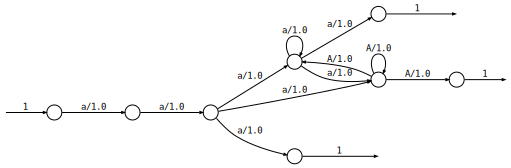

In [63]:
import genparse.wfsa

# target cylinder
fsa = genparse.wfsa.WFSA.from_string('aaa', genparse.Float) * (genparse.wfsa.WFSA.lift('a', 1) + genparse.wfsa.WFSA.lift('A', 1)).star()
fsa = fsa.epsremove.trim

fsa.graphviz()

In [57]:
#fsa.to_cfg().language(10)

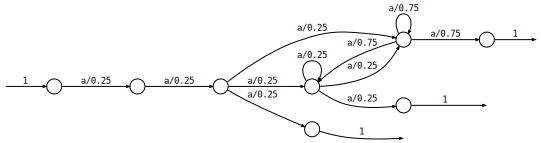

In [64]:
precover = (fst @ fsa).project(0).trim

precover.graphviz()

In [65]:
precover.to_cfg().language(15).sort()

key,value
"('a', 'a', 'a')",0.015625
"('a', 'a', 'a', 'a')",0.015625
"('a', 'a', 'a', 'a', 'a')",0.015625
"('a', 'a', 'a', 'a', 'a', 'a')",0.015625
"('a', 'a', 'a', 'a', 'a', 'a', 'a')",0.015625
"('a', 'a', 'a', 'a', 'a', 'a', 'a', 'a')",0.015625
"('a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a')",0.015625
"('a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a')",0.015625
"('a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a')",0.015625
"('a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a')",0.015625
